# R Simulation of Hodking and Huxley model

Este tutorial está sacado de:

http://www.r-bloggers.com/hodgkin-huxley-model-in-r/



In [1]:
install.packages("simecol")
install.packages("latticeExtra")

ERROR: Error in install.packages(simecol): objeto 'simecol' no encontrado


In [2]:
library(simecol)
## Hodkin-Huxley model
HH <- odeModel(
main = function(time, init, parms) {
  with(as.list(c(init, parms)),{

    am <- function(v) 0.1*(v+40)/(1-exp(-(v+40)/10))
    bm <- function(v) 4*exp(-(v+65)/18)
    ah <- function(v) 0.07*exp(-(v+65)/20)
    bh <- function(v) 1/(1+exp(-(v+35)/10))
    an <- function(v) 0.01*(v+55)/(1-exp(-(v+55)/10))
    bn <- function(v) 0.125*exp(-(v+65)/80)
    
    dv <- (I - gna*h*(v-Ena)*m^3-gk*(v-Ek)*n^4-gl*(v-El))/C
    dm <- am(v)*(1-m)-bm(v)*m
    dh <- ah(v)*(1-h)-bh(v)*h
    dn <- an(v)*(1-n)-bn(v)*n
    
    return(list(c(dv, dm, dh, dn)))
  })
  },
  ## Set parameters
  parms = c(Ena=50, Ek=-77, El=-54.4, gna=120, gk=36, gl=0.3, C=1, I=0),
  ## Set integrations times
  times = c(from=0, to=40, by = 0.25),
  ## Set initial state
  init = c(v=-65, m=0.052, h=0.596, n=0.317),
  solver = "lsoda"
)

Loading required package: deSolve
Warning message:
: package ‘deSolve’ was built under R version 3.2.4
Attaching package: ‘deSolve’

The following object is masked from ‘package:graphics’:

    matplot



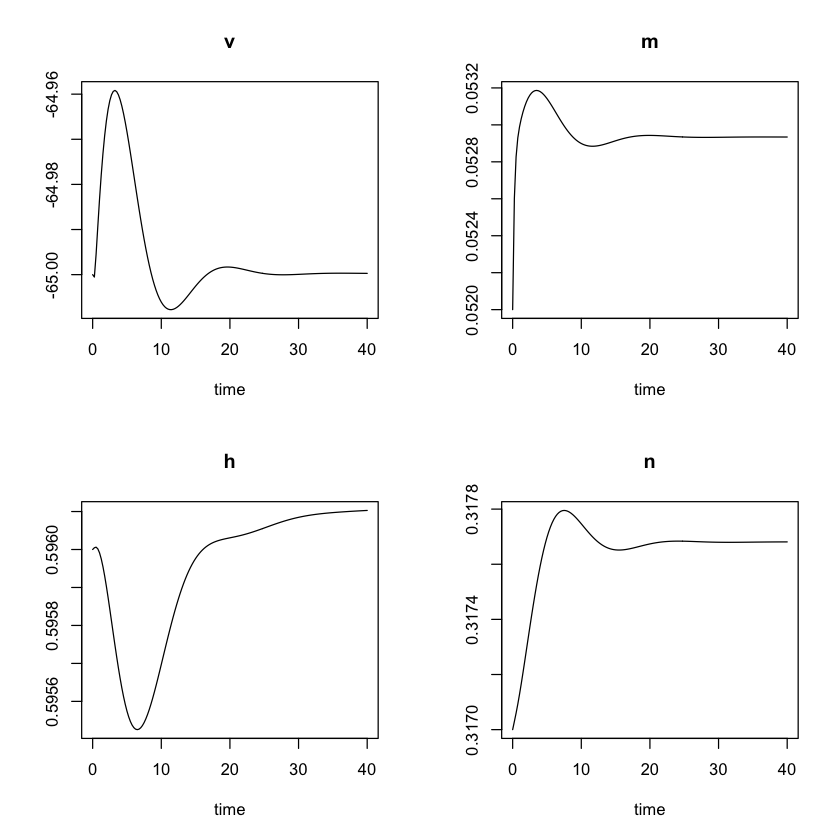

In [3]:
HH <- sim(HH)
plot(HH)

From the initial state I observe a tiny stimulus which reverts quickly back to the resting state. So let’s increase the external stimulus in steps to observe its impact on the membrane voltage:

Loading required package: lattice
Loading required package: RColorBrewer


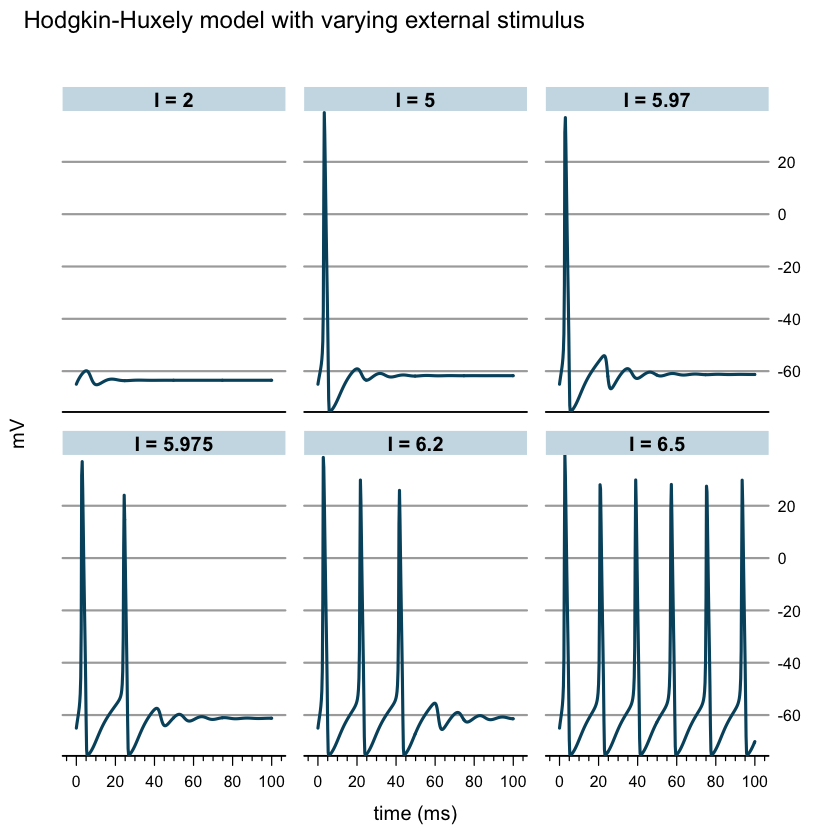

In [5]:
times(HH)["to"] <- 100
## Stimulus
I <- c(2, 5, 5.97, 5.975, 6.2, 6.5)
sims <- do.call("rbind",
          lapply(I, function(i){
            parms(HH)["I"] <- i
            HH <- sim(HH)
            cbind(I=paste("I =", i), out(HH))
          }))


## Plot the various experiments with lattice 
library(latticeExtra)
asTheEconomist(
  xyplot(v ~ time | factor(I), data=sims, type="l", 
         as.table=TRUE, 
         main="Hodgkin-Huxely model with varying external stimulus"), 
xlab="time (ms)", ylab="mV")

Now, this is exciting, as I increase the external stimulus an action potential is generated. Increasing the stimulus further results in a constant firing of the neuron, or in other words, the model is going through a Hopf-bifurcation.

I think it is absolutely remarkable what Hodgkin and Huxley achieved 60 years ago. They could demonstrate that numerical integration of their model could reproduce all the key biophysical properties of the action potential. And what seems so easy on a computer with R or other software, such as XPP/XPPAUT today, must have been a lot of work in the late 40s, early 50s of the 20th century.